In [ ]:
# Dataset for this project collecing from kaggle, download using following link- 
#https://www.kaggle.com/zalando-research/fashionmnist

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion_test_df = pd.read_csv('G:/Projects/ML projects/ML_Projects/fashoin class classification/fashion-mnist_test.csv/fashion-mnist_test.csv')

In [3]:
fashion_train_df = pd.read_csv('G:/Projects/ML projects/ML_Projects/fashoin class classification/fashion-mnist_train.csv/fashion-mnist_train.csv')

In [4]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
training = np.array(fashion_train_df, dtype = 'float32')

In [8]:
testing = np.array(fashion_test_df, dtype = 'float32')

In [9]:
import random
i = random.randint(1, 60000)

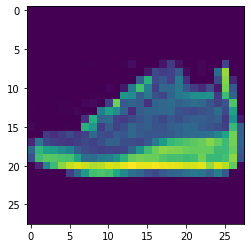

In [10]:
plt.imshow(training[i, 1:].reshape(28,28))

In [11]:
label = training[i, 0]
label

7.0

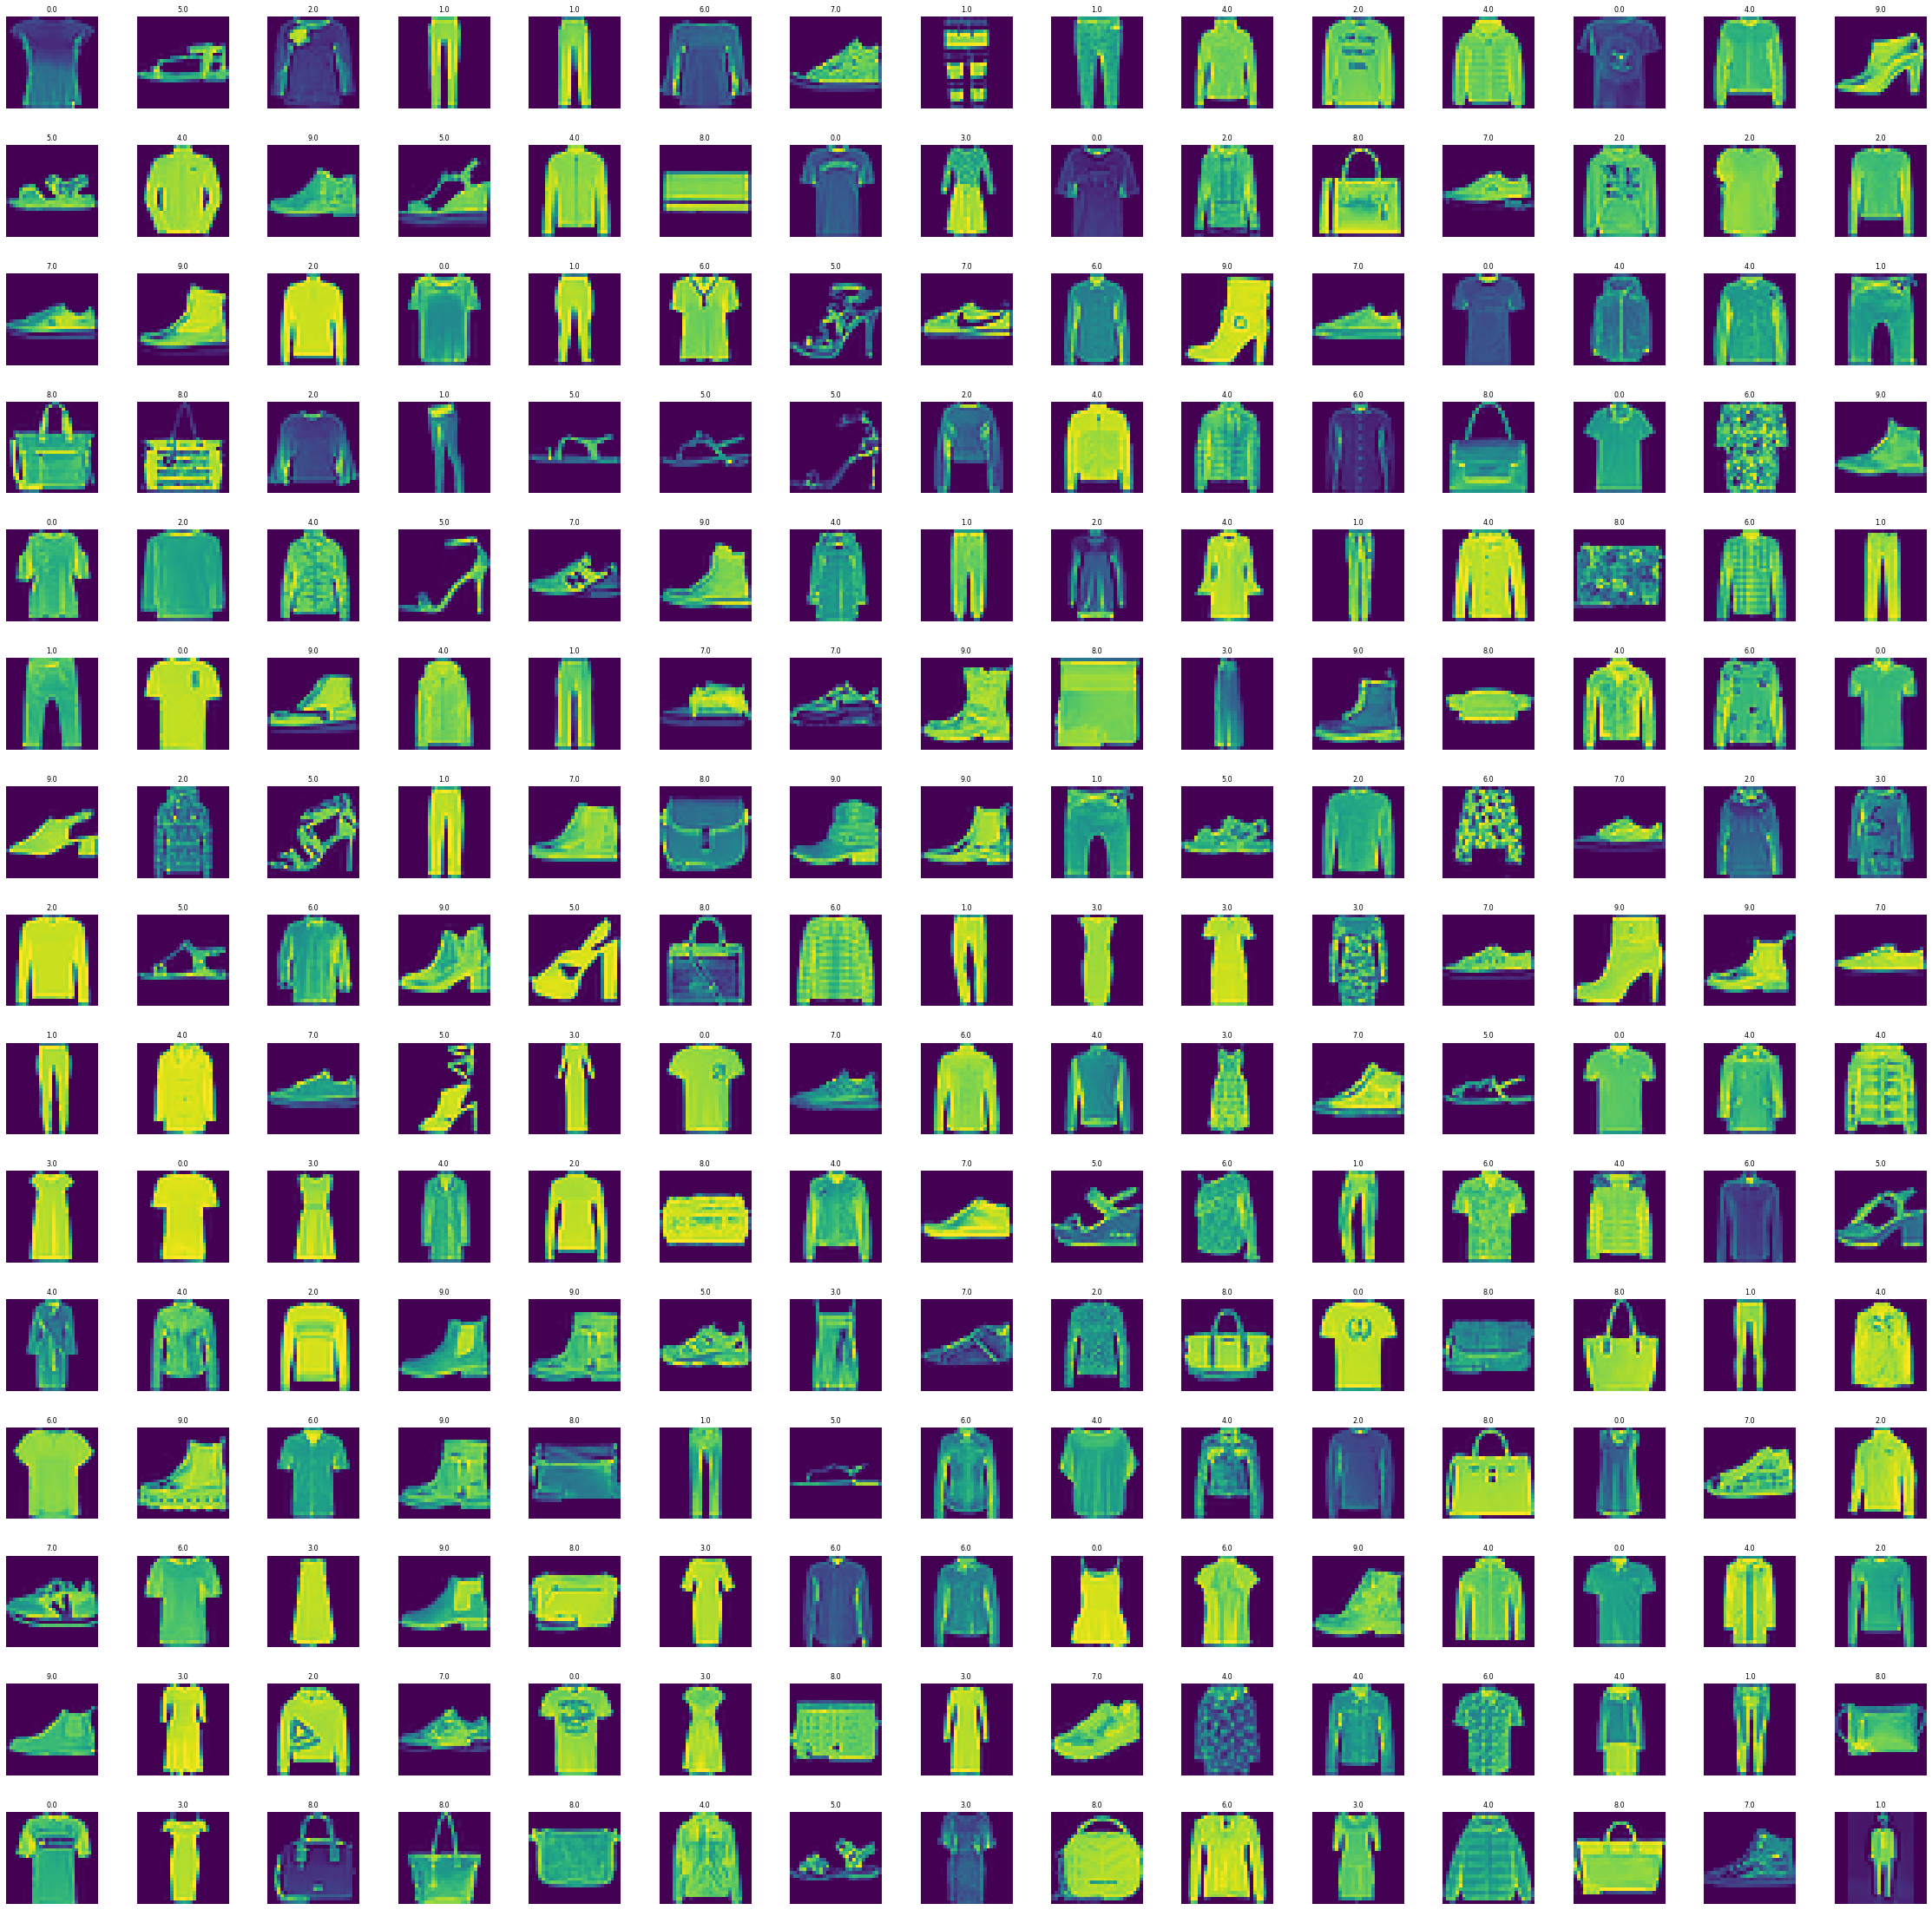

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(40,40))
axes = axes.ravel()
n_training = len(training)

for i in range(0, W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace=0.4)

In [13]:
# training the model

In [14]:
# Prepare training and test data by doing a quick normalization
X_train = training[:,1:]/255 # All columns except first
y_train = training[:,0] # First column has the target info

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
# Split training data into data for training and validation. Remember that we have a separate set of data for testing
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [16]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [24]:
import keras

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [42]:
cnn_model = Sequential()

In [43]:
cnn_model.add(Conv2D(32,3, 3, input_shape = (28,28,1), activation='relu'))

In [44]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [30]:
cnn_model.add(Flatten())

In [45]:
cnn_model.add(Dropout(0.25))

In [48]:
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))

In [49]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', 
                  optimizer=Adam(lr=0.001),
                  metrics =['accuracy'])

In [55]:
epochs = 50

In [ ]:
cnn_model.fit(X_train,
              y_train,
              batch_size = 512,
              epochs = epochs,
              verbose = 1,
              validation_data = (X_validate, y_validate))

In [57]:
# model evaluation

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

In [59]:
predicted_classes = cnn_model.predict_classes(X_test)

C:\Users\dhira\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [60]:
predicted_classes

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 6],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 6, 0],
        [0, 0, 0, 6],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int64)

In [ ]:
L = 5
W = 5
fig, axes = plt.subplot(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshpe(28,28))
    axes[i].set_title("Predicted class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
    
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predictions, target_names = target_names))